Regresión logística
La regresión logística es un tipo de análisis de regresión, utilizado para predecir el
resultado de una variable categórica (una variable que puede adoptar un número
limitado de categorías) en función de otras variables independientes.
Es útil para modelar la probabilidad de que un evento pueda ocurrir en función de
otros factores.
Es un método de clasificación, por ejemplo, para clasificar los correos según sean
válidos o no, para clasificar a las personas que solicitan un préstamo según lo
puedan pagar o no, o para clasificar a las personas según tengan o no una
enfermedad concreta.
Subti
'Estos ejempios, son ejempios de ciasificaciones binarias, es las que solo nay
cátegorias4.01 o =0) (categoría 1 o categoría 2)

Regresión logística
Una matriz de confusión sirve para evaluar nuestro modelo de regresión logística.
Ejemplo de una matriz de confusión para unas pruebas de detección de spam
correos totals = 200
Valor real = SI es spam
Valor real = NO es spam
Predicción (SI es spam)
30 (PC)
5 (FP)
Predicción (NO es spam)
15 (FN)
150 (NC)
PC (positivos correctos), NC(negativos correctos)
ED (falcos positivos errortipo 1) EN /falcoc negativos, error tipo 2)
Subtitu

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cd titanic/

[WinError 2] El sistema no puede encontrar el archivo especificado: 'titanic/'
C:\Users\danny\OneDrive\Escritorio\IAgenerativaIBM\MachineLearning\titanic


In [11]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: E6A3-0F0C

 Directorio de C:\Users\danny\OneDrive\Escritorio\IAgenerativaIBM\MachineLearning\titanic

18/07/2024  18:11    <DIR>          .
18/07/2024  18:11    <DIR>          ..
18/07/2024  18:11             3.258 gender_submission.csv
18/07/2024  18:11            28.629 test.csv
18/07/2024  18:11            61.194 train.csv
               3 archivos         93.081 bytes
               2 dirs  329.692.786.688 bytes libres


In [105]:
entrenamiento =pd.read_csv('train.csv')

In [107]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
entrenamiento.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

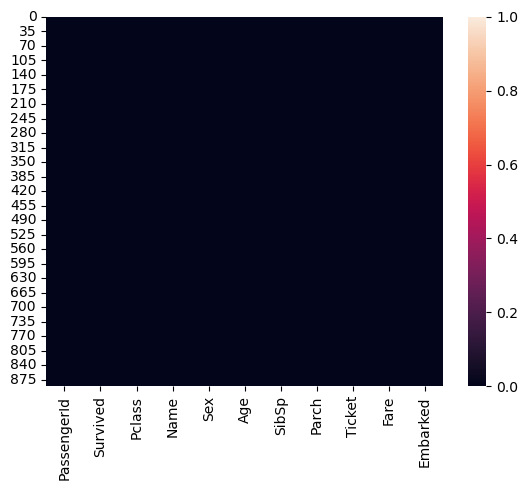

In [139]:
sns.heatmap(entrenamiento.isnull())

<Axes: xlabel='Survived', ylabel='count'>

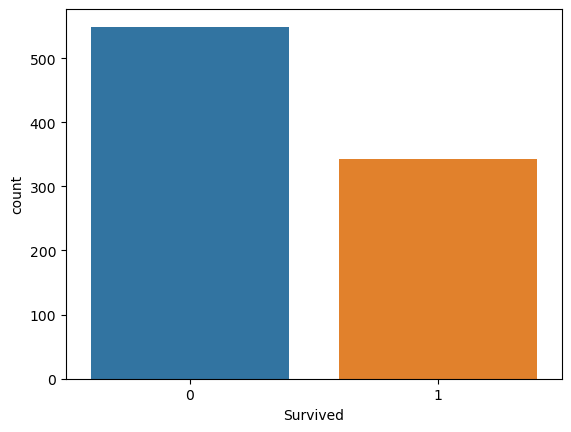

In [33]:
sns.countplot(x='Survived', data=entrenamiento)

<Axes: xlabel='Survived', ylabel='count'>

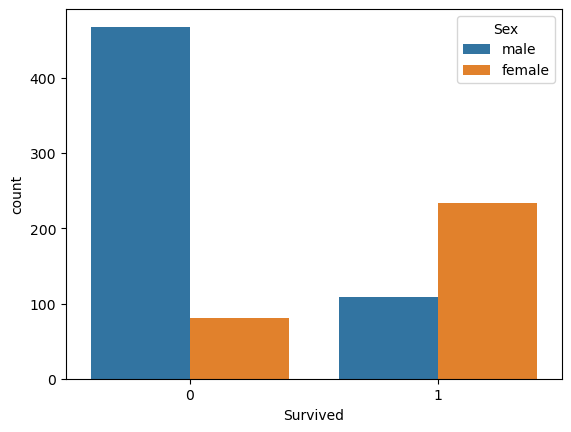

In [37]:
sns.countplot(x='Survived', data=entrenamiento, hue='Sex')

In [41]:
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

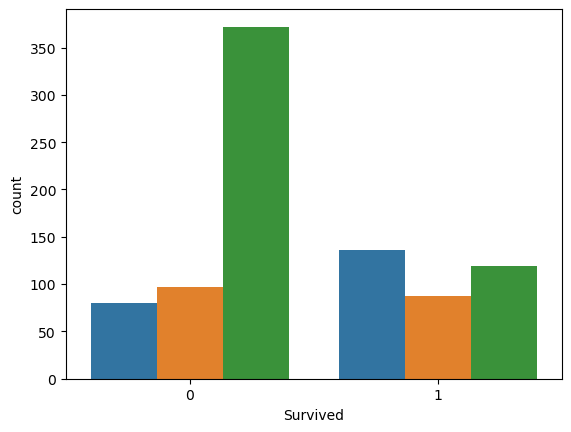

In [45]:
sns.countplot(x='Survived', data=entrenamiento, hue='Pclass')

C:\Users\danny\AppData\Local\Temp\ipykernel_17596\306444277.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(entrenamiento['Age'].dropna(), kde=False, bins=30)


<Axes: xlabel='Age'>

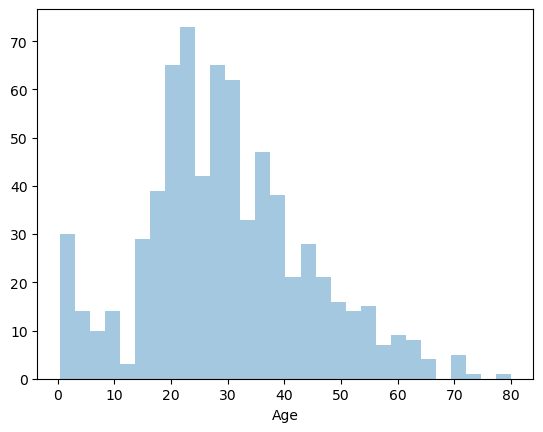

In [49]:
sns.distplot(entrenamiento['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

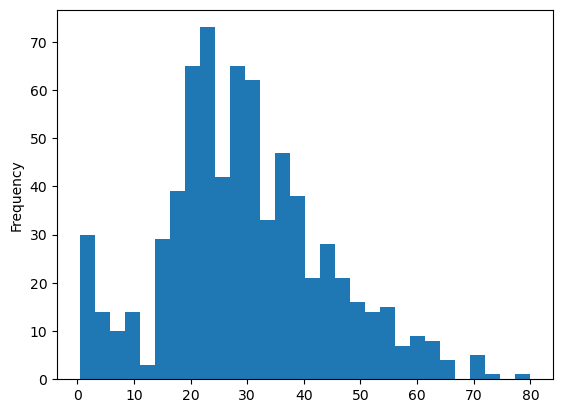

In [57]:
entrenamiento['Age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

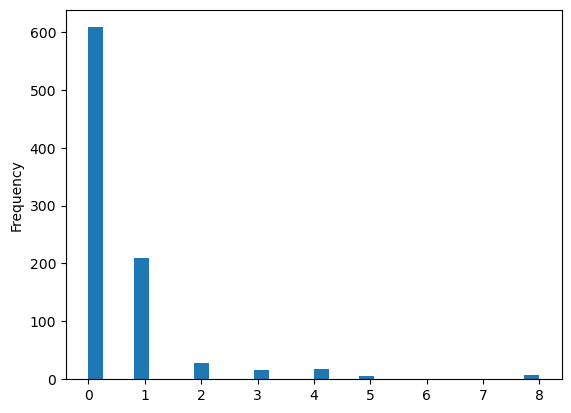

In [61]:
entrenamiento['SibSp'].plot.hist(bins=30)

In [111]:
import cufflinks as cf

In [113]:
cf.go_offline()

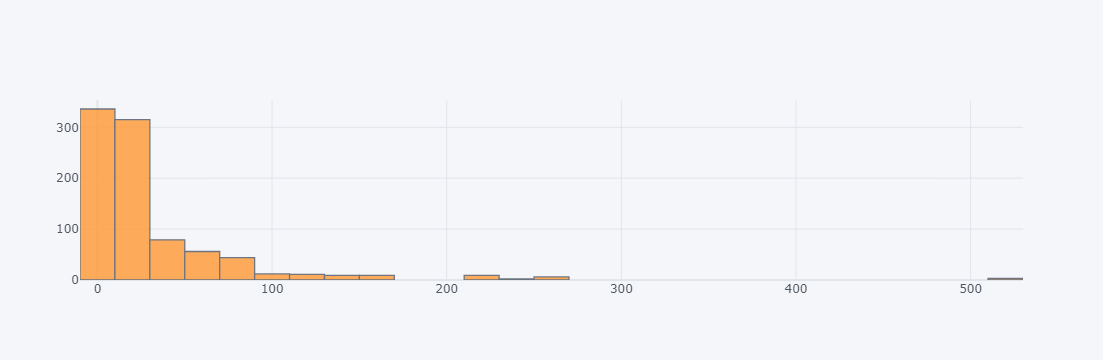

In [115]:
entrenamiento['Fare'].iplot(kind='hist', bins=40)

In [117]:
#cambiar valor nulo por valor medio en edad

<Axes: xlabel='Pclass', ylabel='Age'>

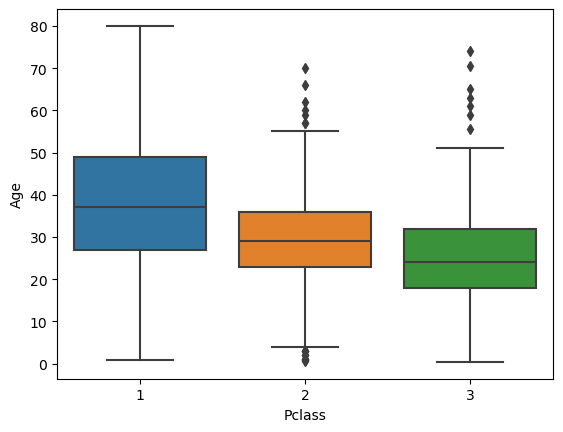

In [119]:
sns.boxplot(x='Pclass', y='Age', data=entrenamiento)

In [121]:
def edad_media(columnas):
    edad = columnas[0]
    clase =columnas[1]
    if pd.isnull(edad):
        if clase==1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad

In [123]:
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)

C:\Users\danny\AppData\Local\Temp\ipykernel_17596\1404889174.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\danny\AppData\Local\Temp\ipykernel_17596\1404889174.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [125]:
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)

C:\Users\danny\AppData\Local\Temp\ipykernel_17596\1404889174.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\danny\AppData\Local\Temp\ipykernel_17596\1404889174.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [131]:
entrenamiento.insull()
sns.heatmap(entrenamiento.isnull())

AttributeError: 'DataFrame' object has no attribute 'insull'

In [135]:
entrenamiento.drop('Cabin', axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

<Axes: >

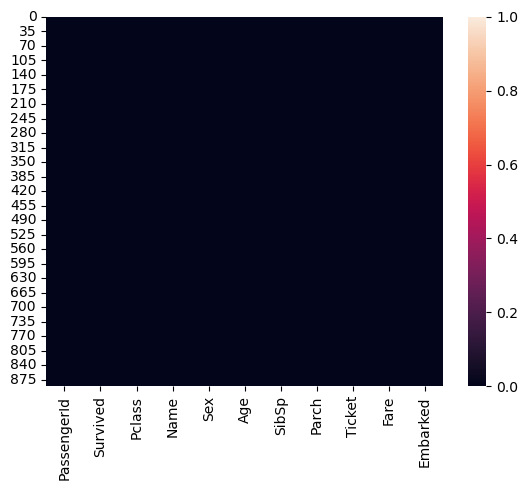

In [143]:
sns.heatmap(entrenamiento.isnull())

In [147]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [149]:
#regresion logistica solo nos interesan las columnas númericas

In [153]:
entrenamiento.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

KeyError: "['Name', 'Ticket', 'PassengerId'] not found in axis"

In [157]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [173]:
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True)

In [ ]:
#con esa última fila hemos cambiado el sexo en true o false

In [175]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [181]:
entrenamiento = pd.concat([entrenamiento, sexo], axis=1)

In [185]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,male
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,NaN,True
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,NaN,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,NaN,False
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,NaN,False
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,NaN,True


In [189]:
entrenamiento.drop('Sex', axis=1, inplace=True)

KeyError: "['Sex'] not found in axis"

In [191]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,male
0,0.0,3.0,22.0,1.0,0.0,7.2500,S,NaN,True
1,1.0,1.0,38.0,1.0,0.0,71.2833,C,NaN,False
2,1.0,3.0,26.0,0.0,0.0,7.9250,S,NaN,False
3,1.0,1.0,35.0,1.0,0.0,53.1000,S,NaN,False
4,0.0,3.0,35.0,0.0,0.0,8.0500,S,NaN,True


In [195]:
puerto = pd.get_dummies(entrenamiento['Embarked'], drop_first=True)

In [197]:
puerto

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,False
887,False,False
888,False,False
889,False,False


In [201]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,male
0,0.0,3.0,22.0,1.0,0.0,7.2500,S,NaN,True
1,1.0,1.0,38.0,1.0,0.0,71.2833,C,NaN,False
2,1.0,3.0,26.0,0.0,0.0,7.9250,S,NaN,False
3,1.0,1.0,35.0,1.0,0.0,53.1000,S,NaN,False
4,0.0,3.0,35.0,0.0,0.0,8.0500,S,NaN,True


In [207]:
entrenamiento.drop('male', axis=1, inplace=True)

In [211]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [215]:
y = entrenamiento['Survived']
X=  entrenamiento.drop('Survived', axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN


In [219]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    NaN
887    NaN
888    NaN
889    NaN
890    NaN
Name: Survived, Length: 2673, dtype: float64

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=45)

In [237]:
y_test

521    NaN
866    1.0
562    NaN
200    0.0
71     NaN
      ... 
132    NaN
570    1.0
395    NaN
93     NaN
818    0.0
Name: Survived, Length: 802, dtype: float64

In [227]:
X_train

,Pclass,Age,SibSp,Parch,Fare
211,2.0,35.0,0.0,0.0,21.0000
151,NaN,NaN,NaN,NaN,NaN
461,3.0,34.0,0.0,0.0,8.0500
417,NaN,NaN,NaN,NaN,NaN
445,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
163,3.0,17.0,0.0,0.0,8.6625
607,1.0,27.0,0.0,0.0,30.5000
134,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN


In [231]:
X_test

,Pclass,Age,SibSp,Parch,Fare
521,NaN,NaN,NaN,NaN,NaN
866,2.0,27.0,1.0,0.0,13.8583
562,NaN,NaN,NaN,NaN,NaN
200,3.0,28.0,0.0,0.0,9.5000
71,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
132,NaN,NaN,NaN,NaN,NaN
570,2.0,62.0,0.0,0.0,10.5000
395,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN


In [239]:
y_train

211    1.0
151    NaN
461    0.0
417    NaN
445    NaN
      ... 
163    0.0
607    1.0
134    NaN
776    NaN
680    NaN
Name: Survived, Length: 1871, dtype: float64

In [245]:
from sklearn.linear_model import LogisticRegression

In [249]:
modelo= LogisticRegression()

In [253]:
modelo.fit(X_train, y_train) #con esto lo entrenamos

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [257]:
predicciones = modelo.predict(X_test)
predicciones

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [259]:
from sklearn.metrics import classification_report

In [263]:
print(classification_report(y_test, predicciones))

NameError: name 'predicciones' is not defined

In [265]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

NameError: name 'predicciones' is not defined